## CLIMB

This report encompasses all the methods, process, and description about the work that has been done during my research for the **CLIMB** project.


## DUC Classification


In [38]:
import geopandas as gpd
import pandas as pd

shapefile_path = r"gadm41_SEN_shp/gadm41_SEN_2.shp"

csv_path = r"GHS_DUC_MT_GLOBE_R2023A_V2_0\GHS_DUC_GLOBE_R2023A_V2_0_GADM41_2010_level2.csv"

join_key_shapefile = "GID_2"  # Adjust if your shapefile uses a different column
join_key_csv = "GID_2"  # Adjust to match your CSV

# csv columns 2-10 to add by index
csv_columns = [0,1,2, 3, 4, 5, 6, 7, 8, 9,10]
# Get the column names from the CSV file
csv_columns_to_add = pd.read_csv(csv_path, usecols=csv_columns).columns.tolist()

# === LOAD FILES ===
# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Load the CSV and keep only relevant columns
df = pd.read_csv(csv_path, usecols=csv_columns_to_add)



FileNotFoundError: [Errno 2] No such file or directory: 'GHS_DUC_MT_GLOBE_R2023A_V2_0\\GHS_DUC_GLOBE_R2023A_V2_0_GADM41_2010_level2.csv'

In [9]:
df

,GID_2,GID_0GHSL,Tot_Pop,UCentre_Pop,UCluster_Pop,Rural_Pop,UCentre_share,UCluster_share,Urban_share,Rural_share,DEGURBA_L1
0,AFG.1.1_1,AFG,100639.720267,0.000000,62814.045917,37825.674350,0.000000,0.624148,0.624148,0.375852,2
1,AFG.1.2_1,AFG,68948.291567,0.000000,21976.405686,46971.885881,0.000000,0.318737,0.318737,0.681263,1
2,AFG.1.3_1,AFG,285390.505820,102525.729727,130290.909980,52573.866114,0.359247,0.456536,0.815783,0.184217,2
3,AFG.1.4_1,AFG,15768.539903,0.000000,4179.388826,11589.151077,0.000000,0.265046,0.265046,0.734954,1
4,AFG.1.5_1,AFG,106706.592932,0.000000,79491.029154,27215.563778,0.000000,0.744950,0.744950,0.255050,2
...,...,...,...,...,...,...,...,...,...,...,...
47212,ZWE.10.10_2,ZWE,35188.027792,0.000000,32982.779462,2205.248330,0.000000,0.937330,0.937330,0.062670,2
47213,ZWE.10.11_2,ZWE,75324.589510,0.000000,0.000000,75324.589510,0.000000,0.000000,0.000000,1.000000,1
47214,ZWE.10.12_2,ZWE,21423.395671,0.000000,17599.097029,3824.298642,0.000000,0.821490,0.821490,0.178510,2
47215,ZWE.10.13_2,ZWE,69094.821447,0.000000,218.981429,68875.840018,0.000000,0.003169,0.003169,0.996831,1


In [10]:

# === MERGE DATA ===
# Merge the CSV data into the shapefile GeoDataFrame
merged_gdf = gdf.merge(df, left_on=join_key_shapefile, right_on=join_key_csv, how="left")


In [11]:
merged_gdf

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,...,GID_0GHSL,Tot_Pop,UCentre_Pop,UCluster_Pop,Rural_Pop,UCentre_share,UCluster_share,Urban_share,Rural_share,DEGURBA_L1
0,SEN.1.1_1,SEN,Senegal,SEN.1_1,Dakar,NA,Dakar,NA,NA,Département,...,SEN,1.086532e+06,1.085397e+06,0.000000,1135.316103,0.998955,0.000000,0.998955,0.001045,3
1,SEN.1.2_1,SEN,Senegal,SEN.1_1,Dakar,NA,Guédiawaye,NA,NA,Département,...,SEN,2.331811e+05,2.331811e+05,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3
2,SEN.1.3_1,SEN,Senegal,SEN.1_1,Dakar,NA,Pikine,NA,NA,Département,...,SEN,1.228144e+06,1.226035e+06,1875.862489,232.825894,0.998283,0.001527,0.999810,0.000190,3
3,SEN.1.4_1,SEN,Senegal,SEN.1_1,Dakar,NA,Rufisque,Rufisque-Bargny,NA,Département,...,SEN,3.667822e+05,2.093637e+05,138089.240159,19329.168171,0.570812,0.376488,0.947301,0.052699,3
4,SEN.2.1_1,SEN,Senegal,SEN.2_1,Diourbel,NA,Bambey,NA,NA,Département,...,SEN,2.835778e+05,0.000000e+00,171477.316116,112100.529608,0.000000,0.604692,0.604692,0.395308,2
5,SEN.2.2_1,SEN,Senegal,SEN.2_1,Diourbel,NA,Diourbel,NA,NA,Département,...,SEN,2.487393e+05,1.775517e+05,3005.746498,68181.844227,0.713806,0.012084,0.725890,0.274110,3
6,SEN.2.3_1,SEN,Senegal,SEN.2_1,Diourbel,NA,Mbacké,M'Back,NA,Département,...,SEN,8.642878e+05,7.838691e+05,39417.733363,41000.945574,0.906954,0.045607,0.952561,0.047439,3
7,SEN.3.1_1,SEN,Senegal,SEN.3_1,Fatick,NA,Fatick,NA,NA,Département,...,SEN,3.142547e+05,5.814945e+04,107843.598800,148261.635751,0.185039,0.343173,0.528212,0.471788,2
8,SEN.3.2_1,SEN,Senegal,SEN.3_1,Fatick,NA,Foundiougne,NA,NA,Département,...,SEN,2.531209e+05,0.000000e+00,114682.828798,138438.080136,0.000000,0.453075,0.453075,0.546925,1
9,SEN.3.3_1,SEN,Senegal,SEN.3_1,Fatick,NA,Gossas,NA,NA,Département,...,SEN,8.898316e+04,0.000000e+00,46385.813278,42597.350223,0.000000,0.521288,0.521288,0.478712,2


In [13]:

# === SAVE OUTPUT ===
# Save to a new shapefile or GeoPackage
#create output directory if it doesn't exist
import os
if not os.path.exists('duc'):
    os.makedirs('duc')
    # Save to a new shapefile
output_path = r"duc/DUC_gadm_level2.shp"
merged_gdf.to_file(output_path)

print("Merge completed. Output saved to:", output_path)

Merge completed. Output saved to: duc/DUC_gadm_level2.shp


C:\Users\Khizer Zakir\AppData\Local\Temp\ipykernel_34056\2830238323.py:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_gdf.to_file(output_path)
c:\ProgramData\miniconda3\envs\climb\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'UCentre_Pop' to 'UCentre_Po'
  ogr_write(
c:\ProgramData\miniconda3\envs\climb\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'UCluster_Pop' to 'UCluster_P'
  ogr_write(
c:\ProgramData\miniconda3\envs\climb\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'UCentre_share' to 'UCentre_sh'
  ogr_write(
c:\ProgramData\miniconda3\envs\climb\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'UCluster_share' to 'UCluster_s'
  ogr_write(
c:\ProgramData\miniconda3\envs\climb\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field 

## Indices Analysis

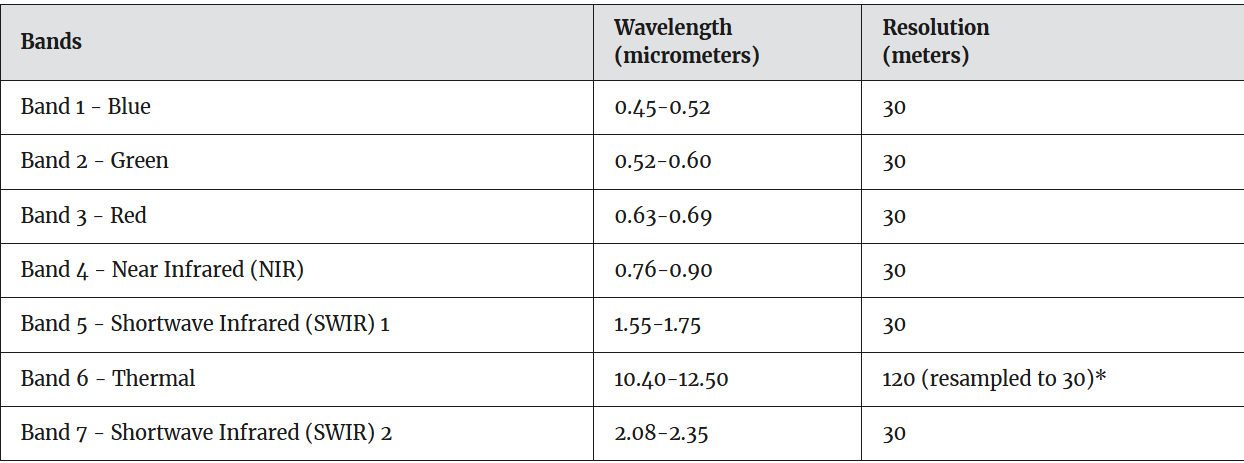

In [11]:
import ee
import geemap.core as geemap
import datetime

In [12]:
ee.Authenticate()
ee.Initialize()

In [31]:
# -----------------------------
# 1. Get Senegal Admin Boundaries
# -----------------------------
def get_senegal_adm0():
    return ee.FeatureCollection("FAO/GAUL/2015/level0").filter(ee.Filter.eq("ADM0_NAME", "Senegal"))

def get_senegal_adm2():
    return ee.FeatureCollection("FAO/GAUL/2015/level2").filter(ee.Filter.eq("ADM0_NAME", "Senegal"))


In [37]:
senegal_adm0 = get_senegal_adm0()
Map = geemap.Map()
Map.addLayer(senegal_adm0, {}, "Senegal Admin 0")
Map.centerObject(senegal_adm0, 6)
Map

Map(center=[14.356043557179225, -14.456310197758045], controls=(ZoomControl(options=['position', 'zoom_in_text…

In [30]:
process_year_indices(2010)

EEException: Collection.toList: The value of 'count' must be positive. Got: 0.

## Net Migration Data

$ Migration_{net} = Migration_{in} - Migration_{out} $

In the following section, the objective is to find the mean and the aggregate of net migration in the selected regions of senegal over the years to observe and understand the pattern. However, before all that we will provide a general overview of the methodology used to estimate the net migration in the **JRC Net Migration** product.

---

## Methodology Review

Estimate **net migration** (i.e. how many people moved in or out) **across cities, towns, and rural areas** globally from **1975 to 2020** (every 5 years), at a very detailed level (1 km² grid cells). 

---

### Why is this hard?

To estimate migration, you need to know:

* How population changed
* How much of that change is due to **births and deaths** (called **natural change**)
* The rest is assumed to be **migration**

The problem is:

* Data on **birth and death rates** in cities, towns, and rural areas is **often missing**
* They had to **estimate or impute** missing data using education data and regression models

---

### Key Steps:

1. **Data Collection:**

   * Collected **birth and death rates** by area (urban vs. rural) from **UN Demographic Yearbooks**
   * Used **World Population Prospects (WPP)** for national data
   * Used **education data** (share of population with low education) from the **Wittgenstein Centre**

2. **Calculate Natural Change:**

   * Natural change = birth rate − death rate
   * Done by area (city, town, rural) and year, then averaged over 5-year intervals

3. **Impute Missing Values:**

   * If a country didn’t have data for a given area (e.g. rural), they used a **regression model** based on education levels to estimate it.

4. **Balance It:**

   * Ensured that area-specific natural change (for cities, towns, and rural areas) added up correctly to the national total.

5. **Estimate Towns:**

   * Town values were estimated as the **average** of city and rural rates.

6. **Calculate Migration:**

   * Used population data from **GHSL** grids (1 km² resolution)
   * Rescaled GHSL populations to match official WPP country totals
   * Applied the **demographic balancing equation**:

     > Net migration = (Change in population) − (Births − Deaths)

---


## Explanation of the Formulas

### (1) Regression to Impute Missing Natural Change

$$
rnc_{i,t;t+5}^a = \beta_0 + \beta_1 ps_{i,t}^{tot} + \epsilon_{i,t}
$$

* `rnc`: average yearly **rate of natural change** (births − deaths)
* `ps`: **primary share** (share of population with low education)
* `i`: country
* `t`: starting year of 5-year interval
* `a`: area (city or rural)
* They regress known rnc values on `ps` to **predict missing values**

---

### (2) Calibration Equation

$$
rnc_{i,t;t+5}^{tot} = s_{i,t;t+5}^{cit} rnc_{i,t;t+5}^{cit} + s_{i,t;t+5}^{rur} rnc_{i,t;t+5}^{rur} + s_{i,t;t+5}^{twn} rnc_{i,t;t+5}^{twn}
$$

* Ensures the **national natural change** equals the **population-weighted average** of area-specific rates
* `s`: population **share** in each area
* `cit`, `rur`, `twn`: city, rural, town
* Used to **calibrate or correct** area-level estimates

---

### (3) Net Migration Estimation Formula

$$
nm_{c,i,t;t+5}^a = \left( p_{c,i,t+5}^a - p_{c,i,t}^a \right) - 5 \left( rnc_{i,t;t+5}^a \cdot \frac{p_{c,i,t+5}^a + p_{c,i,t}^a}{2} \right)
$$

* `nm`: net migration (number of people)
* `p`: population at the beginning and end of the 5-year period
* `rnc`: average **natural change** rate per year
* `c`: grid cell (1x1 km)
* Subtracts **births and deaths** from population change to isolate **migration**

---

### Interpretation:

This equation is based on the **residual method** for estimating net migration:

> **Net migration = Observed population change – Natural population change**

1. **Population change**: $p_{c,i,t+5}^a - p_{c,i,t}^a$

   * How much the population changed over 5 years.

2. **Natural change**: Estimated as:

   $$
   5 \times \left( rnc_{i,t;t+5}^a \cdot \text{average population over 5 years} \right)
   $$

   * This approximates how much the population would have changed **without migration**, based on birth/death rates.

3. The **difference** gives the number of people who **migrated in or out** over 5 years.

---

### Why this is useful:

* It estimates **net migration** without needing direct migration data, which are often unavailable or incomplete.
* It can be used across **gridded datasets** or **subnational regions** using only demographic inputs (population, birth/death rates).


In [39]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
import pandas as pd
from shapely.geometry import mapping # mapping is used to convert geometries to GeoJSON format
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:


def get_masks_and_stats(raster_paths_dict, shapefile_path):
    gdf = gpd.read_file(shapefile_path)
    results_dict = {}
    summary_rows = []

    for year, raster_path in raster_paths_dict.items():
        with rasterio.open(raster_path) as src:
            if gdf.crs != src.crs:
                gdf = gdf.to_crs(src.crs)

            for idx, row in gdf.iterrows():
                geom = [mapping(row['geometry'])]
                try:
                    out_image, _ = mask(src, geom, crop=True)
                    data = out_image[0]
                    valid_data = data[data != src.nodata]
                    valid_data = valid_data.astype(np.float32)

                    if idx not in results_dict:
                        results_dict[idx] = {}

                    # Store for image display
                    mask_array = np.where(data != src.nodata, data, np.nan)
                    results_dict[idx][year] = mask_array

                    # Stats
                    median_val = np.nanmedian(valid_data) if valid_data.size > 0 else None
                    sum_val = np.nansum(valid_data) if valid_data.size > 0 else 0

                    summary_rows.append({
                        'polygon_id': idx,
                        'year': year,
                        'median': median_val,
                        'sum': sum_val
                    })

                except Exception as e:
                    print(f"Polygon {idx}, year {year}: {e}")
                    results_dict.setdefault(idx, {})[year] = None
                    summary_rows.append({
                        'polygon_id': idx,
                        'year': year,
                        'median': None,
                        'sum': 0
                    })

    summary_df = pd.DataFrame(summary_rows)
    return results_dict, summary_df

In [41]:
def plot_all_polygons_grid(results_dict, cmap='viridis', save_path=None, region_names=None):

    polygon_ids = sorted(results_dict.keys())
    years = sorted(next(iter(results_dict.values())).keys())

    n_rows = len(polygon_ids)
    n_cols = len(years)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows), squeeze=False)

    for i, pid in enumerate(polygon_ids):
        for j, year in enumerate(years):
            ax = axes[i][j]
            data = results_dict[pid].get(year, None)

            if data is not None and np.any(~np.isnan(data)):
                im = ax.imshow(data, cmap=cmap)
            else:
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=10)
            ax.axis('off')

            # Column titles
            if i == 0:
                ax.set_title(str(year), fontsize=14)

            # Region name on the first column
            if j == 0:
                label = region_names[i] if region_names and i < len(region_names) else f"Polygon {pid}"
                ax.text(-0.2, 0.5, label, transform=ax.transAxes,
                        fontsize=12, ha='right', va='center', rotation=0)

    # Adjust spacing to make room for labels
    plt.subplots_adjust(left=0.3, right=0.95, top=0.9, bottom=0.12, wspace=0.05, hspace=0.2)

    # Add shared colorbar at the bottom
    cbar_ax = fig.add_axes([0.4, 0.08, 0.5, 0.01])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Net Migration Value', fontsize=12)

    # plt.suptitle("Net Migration Raster Crops for Each AOI Over Time", fontsize=16, y=0.8)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


In [42]:

def plot_summary_stats(summary_df):
    # Pivot for heatmap
    heatmap_df = summary_df.pivot(index='polygon_id', columns='year', values='sum')
    
    # Heatmap of total migration per polygon over years
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_df, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Sum of Migration per Polygon over Years")
    plt.xlabel("Year")
    plt.ylabel("Polygon ID")
    plt.legend(title='Total Migration')
    plt.tight_layout()
    plt.show()

    # Line plot for median
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=summary_df, x='year', y='median', hue='polygon_id', marker='o')
    plt.title("Median Migration Value per Polygon Over Time")
    plt.xlabel("Year")
    plt.ylabel("Median Value")
    plt.legend(title='Polygon ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



In [43]:
region_names = gpd.read_file(shapefile_path)['ADM2_FR'].tolist()
region_names

DataSourceError: gadm41_SEN_shp/gadm41_SEN_2.shp: No such file or directory

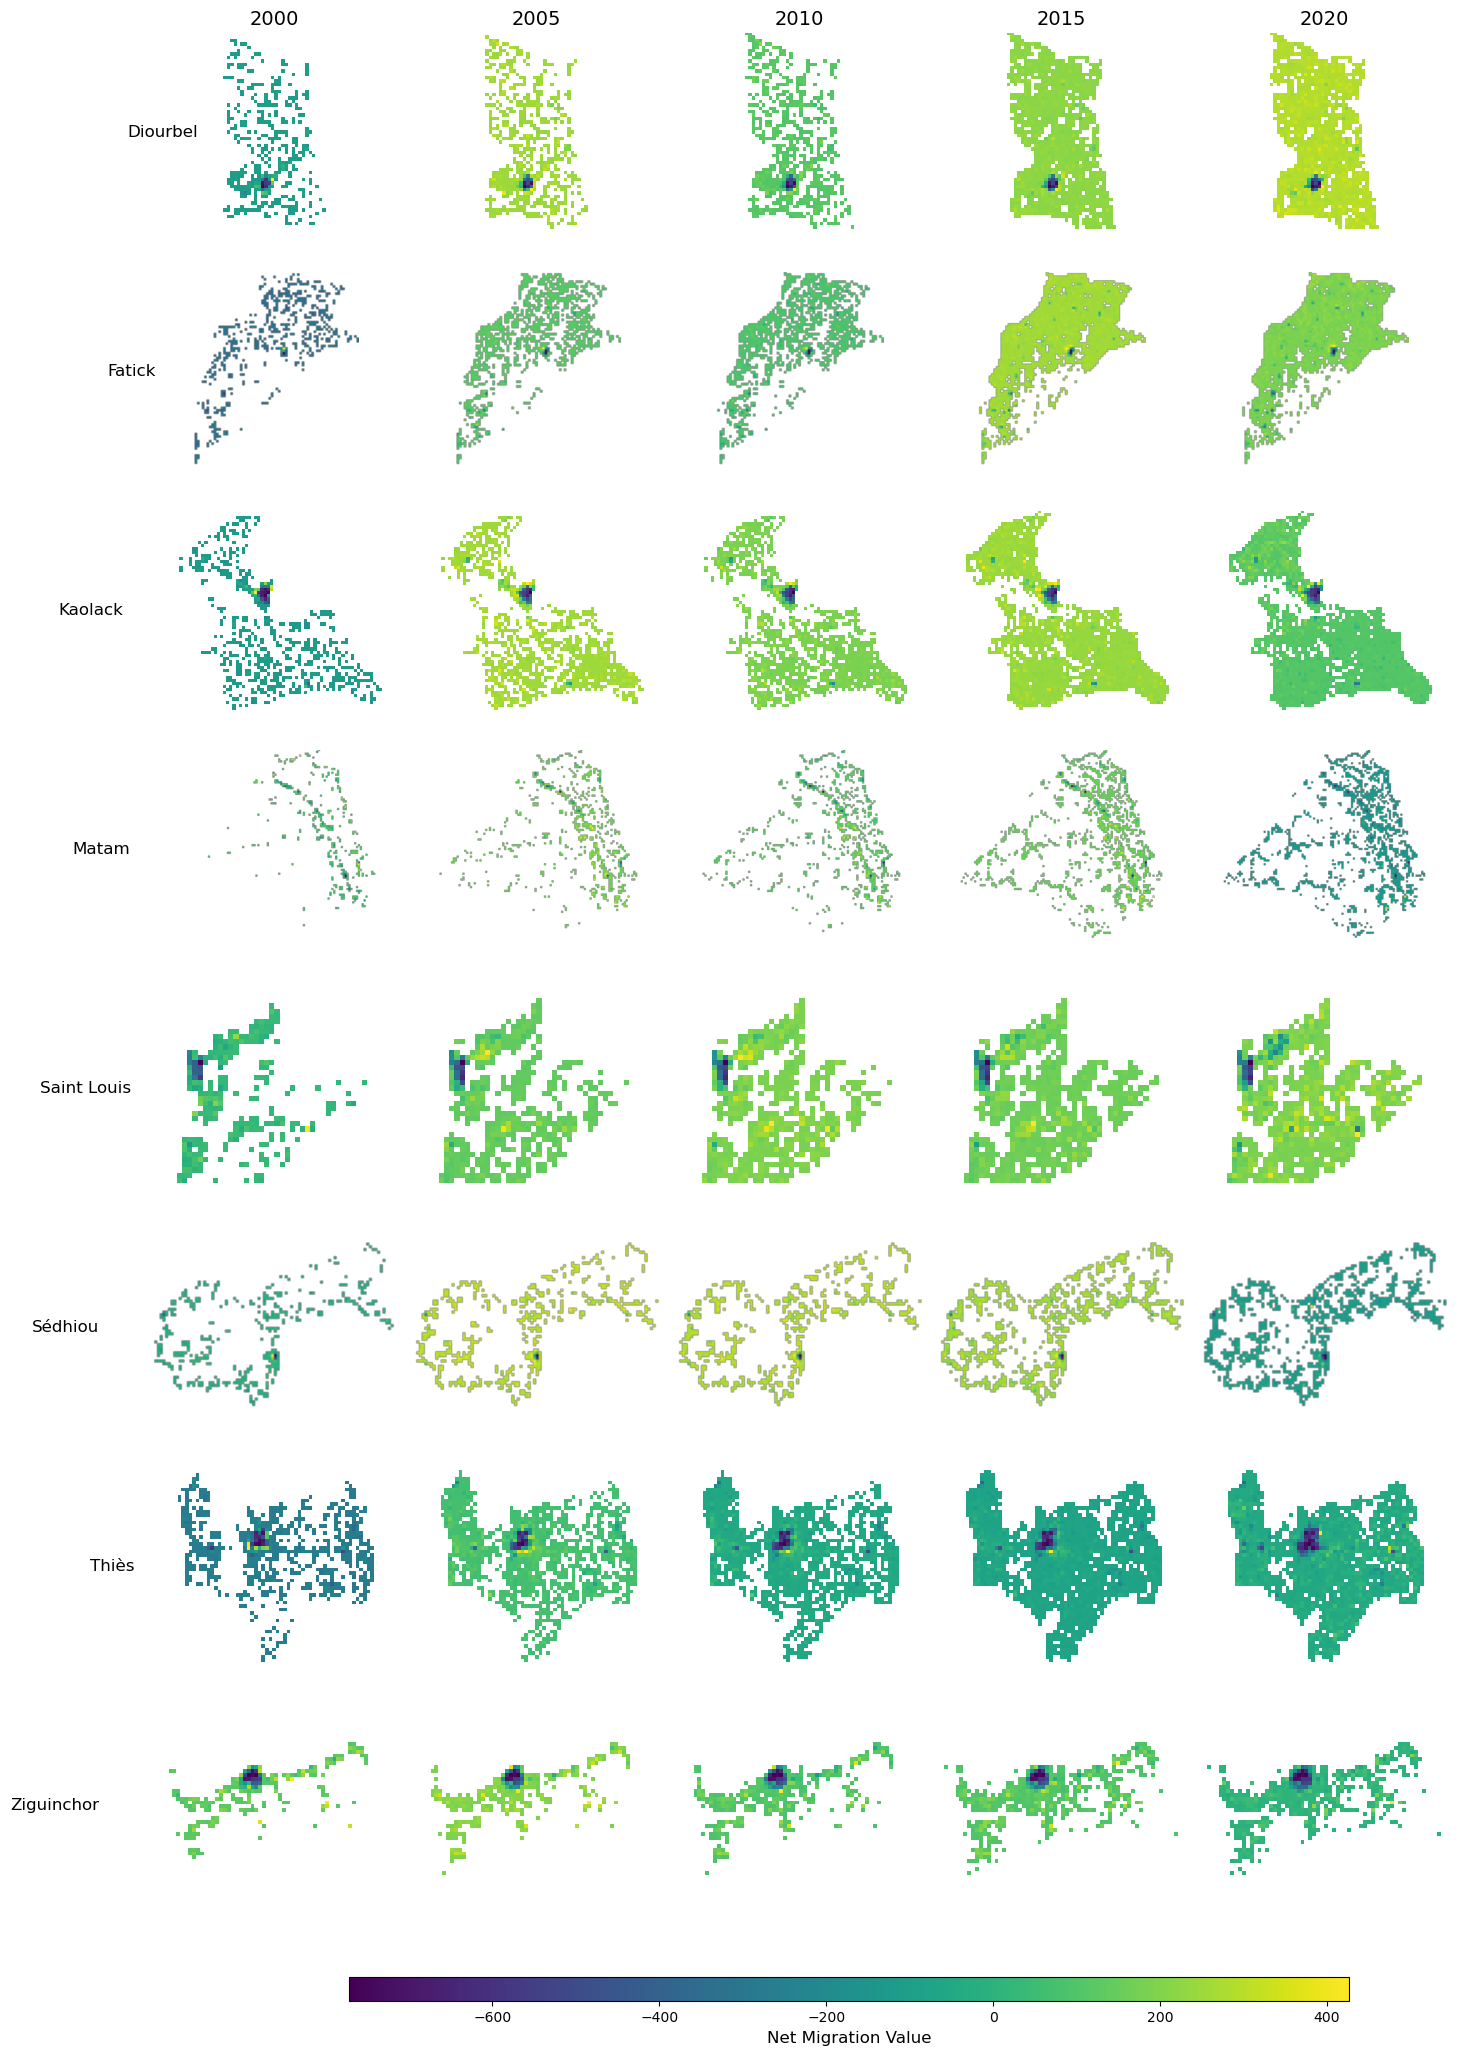

C:\Users\Khizer Zakir\AppData\Local\Temp\ipykernel_27700\1127202545.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Total Migration')


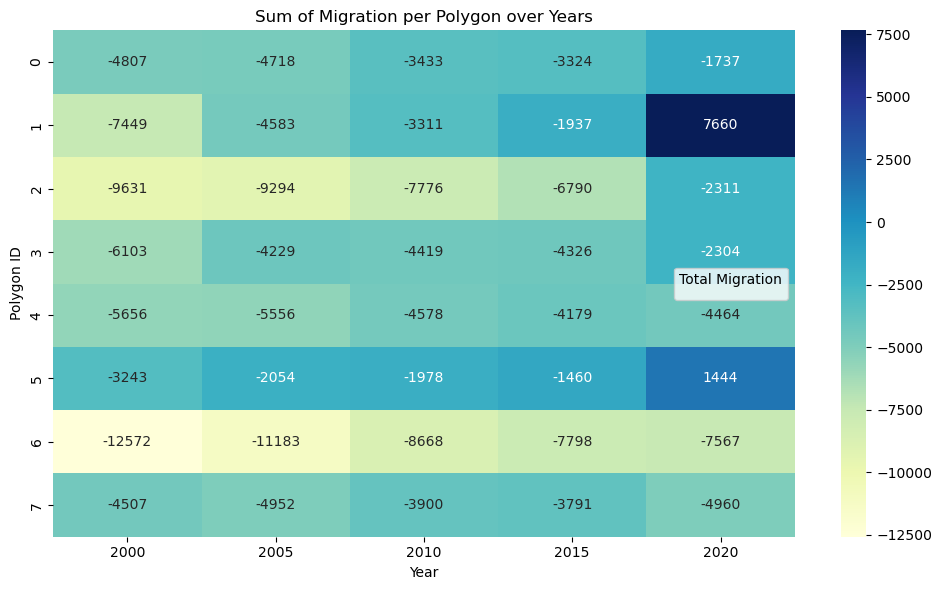

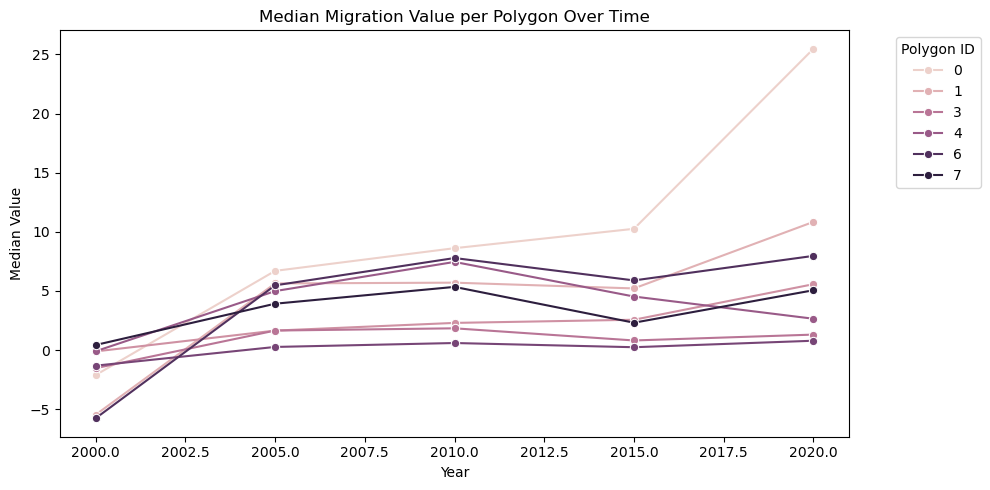

In [46]:
shapefile_path = '../aoi_new.geojson'

raster_paths_dict = {
    2000: '../NetMigrDataset_2023March/NetMigr_2000.tif',
    2005: '../NetMigrDataset_2023March/NetMigr_2005.tif',
    2010: '../NetMigrDataset_2023March/NetMigr_2010.tif',
    2015: '../NetMigrDataset_2023March/NetMigr_2015.tif',
    2020: '../NetMigrDataset_2023March/NetMigr_2020.tif',
}
# take the adm2_fr from shapefile
region_names = gpd.read_file(shapefile_path)['ADM2_FR'].tolist()
results_dict, summary_df = get_masks_and_stats(raster_paths_dict, shapefile_path)
plot_all_polygons_grid(results_dict, region_names=region_names)
plot_summary_stats(summary_df)

# Optionally export:
# summary_df.to_csv("polygon_migration_summary.csv", index=False)


## Access to climate variables data from APIs

There are so many data portals and access APIs. Here we will try to use ECMWF and CDS data APIs to get data for the AOI. 

To work with it you need to make sure the following:

- Have ***`.cdsapi`*** with
     - url: https://cds.climate.copernicus.eu/api
     - key: {you can get it from your CDS account} - You can make your account here: [Climate Data Store (CDS)](https://cds.climate.copernicus.eu/user-guide)
     - Make sure you store the ***`.cdsapi`*** file in the %%USERS%% folder.

- BBOX details for your **AOI** and other parameters.


In [48]:
import os
import glob2
# import h5netcdf
import xarray as xr
import pandas as pd
import geopandas as gpd
# import contextily as ctx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import shutil
import calendar
import hvplot.pandas
import earthaccess
import cdsapi
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")

print("All libraries imported successfully!")


All libraries imported successfully!


In [50]:
# Initialize the CDS API client
c = cdsapi.Client()

dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis_by_hour_of_day"],
    "variable": [
        "2m_temperature",
        "total_precipitation",
        "leaf_area_index_high_vegetation"
    ],
    "year": [
        "2010", "2011","2012", "2013", "2014", "2015", "2016",
        "2017", "2018", "2019",
        "2020", "2021", "2022",
        "2023"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["12:00"],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [16.97, -18.01, 11.5, -11.08] # north, west, south, east -- Bbox using :https://boundingbox.klokantech.com/ 
}

filename = c.retrieve(dataset, request, 'era5_monthly_sen_2014_2024.nc')
print(f"Downloaded file: {filename}")



2025-05-14 11:43:45,607 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-14 11:43:45,608 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-14 11:43:46,530 INFO Request ID is 8b626551-52a9-49db-8894-7670e8bea0e8
2025-05-14 11:43:46,620 INFO status has been updated to accepted
2025-05-14 11:44:09,153 INFO status has been updated to running
2025-05-14 11:45:03,560 WARNING Structural differences in grib fields detected when opening in xarray. Opening the grib file safely, however this may result in files with non-intuitive filenames.
2025-05-14 11:45:03,564 INFO status has been updated to successful


5e7e44ee4e5fd5c8082ef8c57341ad36.nc:   0%|          | 0.00/395k [00:00<?, ?B/s]

Downloaded file: era5_monthly_sen_2014_2024.nc


In [ ]:
ds = xr.open_dataset(filename)
ds

In [ ]:

if "t2m" in ds:
    ds["t2m"] = ds["t2m"] - 273.15  # Kelvin to Celsius
ds['t2m'][131,:,:].plot()

In [ ]:
ds["valid_time"] = pd.to_datetime(ds["valid_time"])

# Variables to plot
variables = ["t2m", "tp", "sst"]

for var in variables:
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12), sharex=True, sharey=False)
    fig.suptitle(f"{var.upper()} Monthly Trends (2014-2024)", fontsize=16)
    
    # Flatten the 4x3 grid for easier indexing
    axes = axes.flatten()
    
    for month in range(1, 13):  
        ax = axes[month - 1]
        month_name = calendar.month_abbr[month]  # Convert number to name
        subset = ds[var].sel(valid_time=ds["valid_time"].dt.month == month)
        
        # Compute spatial mean to get a single time series
        mean_values = subset.mean(dim=["latitude", "longitude"])
        
        # Plot on the corresponding subplot
        sns.lineplot(x=mean_values["valid_time"], y=mean_values, ax=ax, label=f"{month_name}")
        
        ax.set_title(f"{month_name}")  # Use actual month name
        ax.set_xlabel("Year")
        ax.set_ylabel(var.upper())
        ax.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [ ]:
# ds["valid_time"] = pd.to_datetime(ds["valid_time"])

# # Variables to animate
# variables = ["t2m", "tp", "sst"]

# Define geographical extent [West, East, South, North]
extent = [-18, -11, 12, 17]  # Modify as needed

for var in variables:
    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw={"projection": ccrs.PlateCarree()})

    # Add basemap features
    ax.set_extent(extent, crs=ccrs.PlateCarree())  # Set zoom level
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
    ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

    # # Convert temperature from Kelvin to Celsius if needed
    # if var == "t2m":
    #     ds[var] = ds[var] - 273.15  # Kelvin to Celsius

    # Initial plot
    im = ds[var].isel(valid_time=0).plot(ax=ax, cmap="coolwarm", add_colorbar=False, transform=ccrs.PlateCarree())
    cbar = plt.colorbar(im, ax=ax, orientation="vertical")

    def animate(i):
        im.set_array(ds[var].isel(valid_time=i).values.flatten())  # Update data
        ax.set_title(f"{var.upper()} - {str(ds.valid_time.values[i])[:10]}")

    # Create animation
    ani = animation.FuncAnimation(fig, animate, frames=len(ds.valid_time), interval=1000)

    writer = "ffmpeg" if shutil.which("ffmpeg") else "pillow"
    ext = "mp4" if writer == "ffmpeg" else "gif"

    # Save animation
    ani.save(f"{var}_animation.{ext}", writer=writer)

    plt.close(fig)  # Prevents inline display in notebooks

In [ ]:
# # Convert temperature from Kelvin to Celsius **before** the loop
# if "t2m" in ds:
#     ds["t2m"] = ds["t2m"] - 273.15  # Kelvin to Celsius

for var in variables:
    plt.figure(figsize=(14, 6))

    # Compute spatial mean
    mean_values = ds[var].mean(dim=["latitude", "longitude"])

    # Extract time index
    time_index = ds["valid_time"].values

    # Plot line chart
    plt.plot(time_index, mean_values, color="red", linestyle="-", marker="o")#, label="")

    plt.title(f"{var.upper()} - Aggregated Over 132 Months (2014-2024)")
    plt.xlabel("Time")
    plt.ylabel(f"{var.upper()} ({'°C' if var == 't2m' else 'units'})")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    plt.show()

### ***INTERPRETATION***

##### **1. Monthly Trends (2014-2024)**
The first image provides a grid of 12 subplots, each representing a specific month (January to December). 
- Each month shows variations in temperature over the years, with some months exhibiting a more consistent increase or decrease.
- Some months, such as December and April, exhibit a general upward trend, indicating potential warming patterns.

##### **2. Aggregated Trend (132 Months)**
The second image consolidates the monthly data into a single time series plot, giving a clearer picture of temperature variations across the years.
- There are significant fluctuations in temperature across months, likely due to seasonal effects and climatic variations. Despite fluctuations, there is an overall warming trend, particularly in recent years.

Important point to explore:
- The overall warming trend is evident, but the magnitude of the trend and its implications need further analysis
- Senegal, being in the **Sahel region**, is prone to droughts, and a decline in TP alongside rising T2M could indicate increasing aridity (nned to check)
- **Warmer SSTs** in the nearby Atlantic can influence rainfall patterns over Senegal, potentially **reducing precipitation** due to altered monsoon dynamics.   
- It would be useful to analyze SST anomalies alongside T2M to understand potential ocean-atmosphere interactions affecting Senegal’s climate.  

### ***NEXT STEPS***

- ***Overlaying*** settlement layer + pop layer [another proxy if available] to observe the general trend and make an agnostic guess about the mobility
- Understanding the mobility through an impact chain - Building on the anamolies, we can discover the major changes in the regions of interest or the country overall. And, how this may or may not have led to the mobility of people. 
- Open to suggestions